In [248]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly
import plotly.express as px

In [249]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. Каково соотношение ушедших и лояльных клиентов?

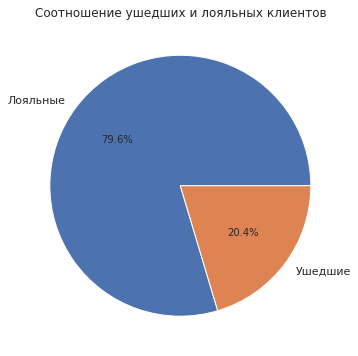

In [250]:
churn_data_1 = churn_data['Exited'].value_counts()

plt.figure(figsize = (11,6))

plt.pie(churn_data_1, labels=['Лояльные', 'Ушедшие'], autopct='%.1f%%')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

Пятая часть клиентов имеют целевой признак "Ушедший", значит, не является клиентом банка. Можем предположить, что это из-за естественных (смерть) и неестественных (переход в другой банк, релокация в другую страну и др.) причин.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

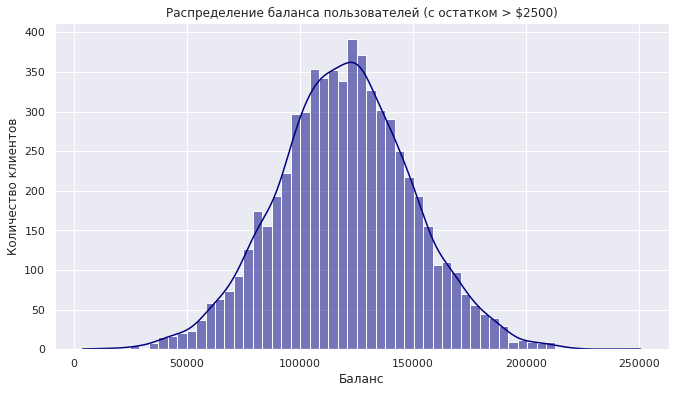

In [251]:
plt.figure(figsize = (11,6))

ax = sns.histplot(data=churn_data.query('Balance > 2500'), x='Balance', kde=True, color = 'navy')
ax.set(xlabel='Баланс', ylabel='Количество клиентов')
plt.title('Распределение баланса пользователей (с остатком > $2500)')
plt.show()

Распределение клинетов по балансу на счёте нормальное (Гаусса), смещения в левую или правую части не наблюдается. Аномальных значений также нет. Распределение говорит о том, что банк работает с клиентами массового сегмента, так как имеются абсолютно разные категории граждан, как бедные, так и богатые.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 

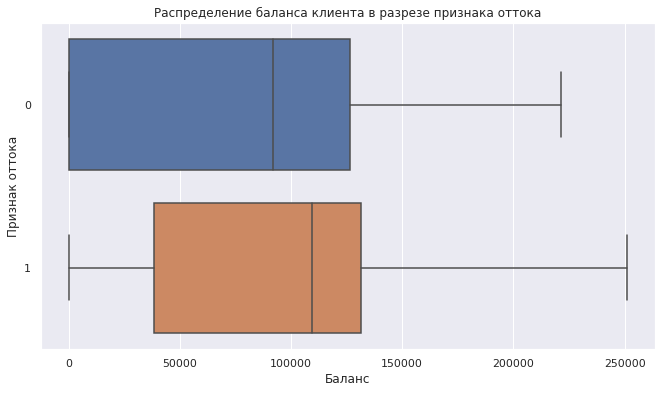

In [252]:
plt.figure(figsize = (11,6))

ax = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
)
ax.set(xlabel='Баланс', ylabel='Признак оттока')
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.show()

На графике "ящика с усами" видим, что распределение баланса между ушедшими клиентами и лояльными отличатся лишь минимальной точкой. Если большинство лояльных клиентов держат различные суммы от 0 до 125 тыс. долл. (медиана - 90 тыс. долл.), тогда как ушедшие клиенты в большинстве своём держали от 40 тыс. долл. до 140 тыс. долл (медиана - 120 тыс. долл). Банк теряет состоятельных клиентов. Возможно, следует предложить какую-нибудь премиальную программу.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 

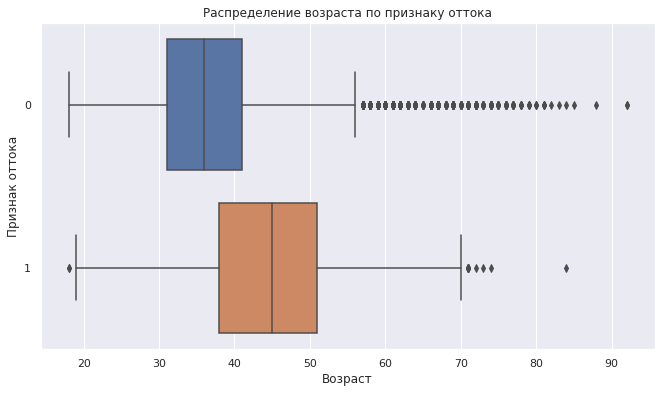

In [253]:
plt.figure(figsize = (11,6))

ax = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h'
)
ax.set(xlabel='Возраст', ylabel='Признак оттока')
plt.title('Распределение возраста по признаку оттока')
plt.show()

Основной возраст оттекающих от 40 до 52 лет. Банку необходимо проанализировать работу с более возврастным сегментом. Активные клиенты банка - люди, 30-40 лет.

Так же наблюдаются аномалии у лояльных клиентов. У банка немного клиентов возрастом старше 55-60 лет.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. 

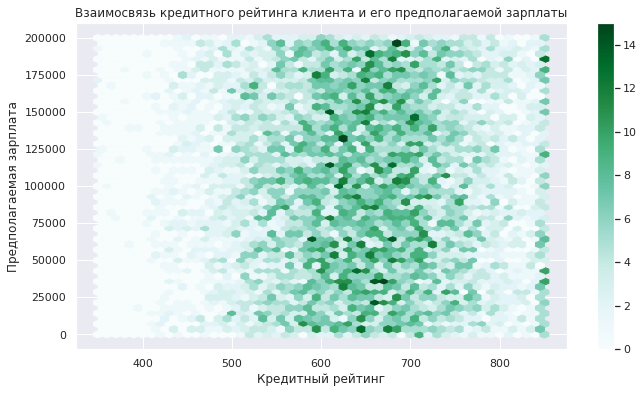

In [254]:
churn_data.plot(x='CreditScore', y='EstimatedSalary', kind='hexbin', gridsize=50, figsize=(11, 6), sharex=False, grid=True)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.show()

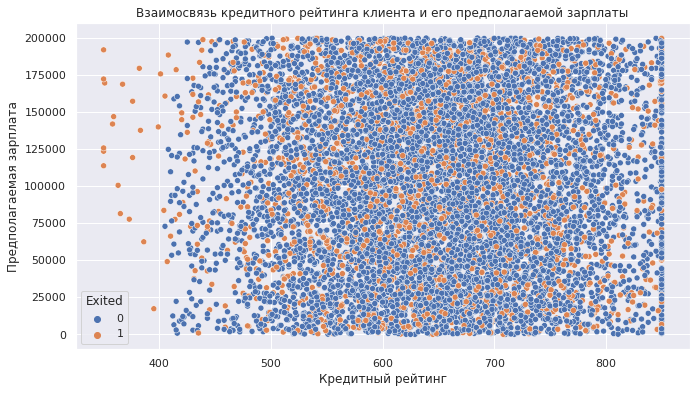

In [255]:
plt.figure(figsize = (11,6))

sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
)

plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.show()

График показывает, что корреляции между кредитным рейтингом клиента и предполагаемой зарплатой клента нет. Так же её не наблюдается в зависимости от пола клиента.

#### 9.6. Кто чаще уходит, мужчины или женщины? 

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

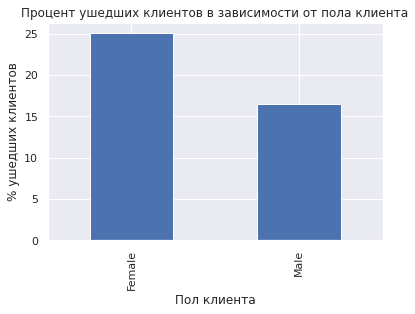

In [256]:
churn_data_2 = churn_data.groupby(['Gender']).mean()
churn_data_2 = churn_data_2['Exited'] * 100
churn_data_2.plot(kind='bar')
plt.title('Процент ушедших клиентов в зависимости от пола клиента')
plt.xlabel('Пол клиента')
plt.ylabel('% ушедших клиентов')
plt.show()

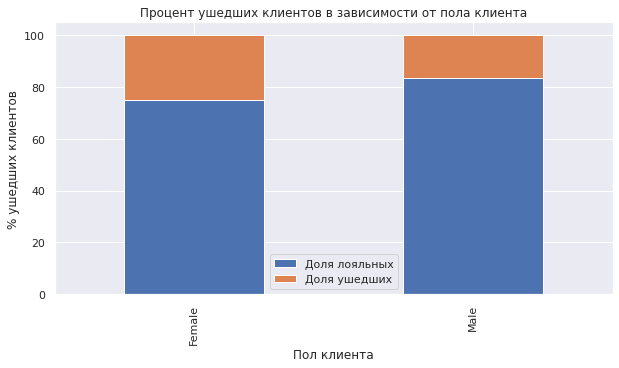

In [257]:
df = pd.DataFrame({
    "Доля лояльных":[74.928461, 83.544072],
    "Доля ушедших":[25.071539, 16.455928],
    }, index=['Female','Male'])

df.plot(kind='bar',figsize=(10,5),stacked=True, legend = True)
plt.title('Процент ушедших клиентов в зависимости от пола клиента')
plt.xlabel('Пол клиента')
plt.ylabel('% ушедших клиентов')
plt.show()

Доля ушедших клиентов больше среди женщин - 25%.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

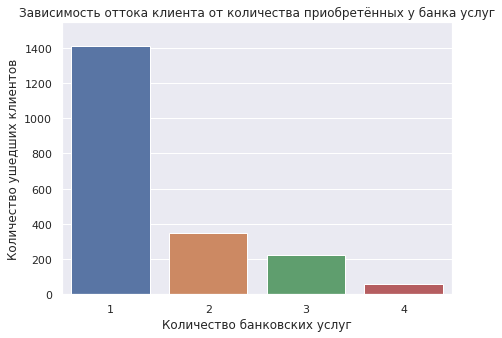

In [258]:
plt.figure(figsize = (7,5))

sns.barplot(data=churn_data, x='NumOfProducts', y='Exited', estimator=sum, errwidth=0)
plt.title('Зависимость оттока клиента от количества приобретённых у банка услуг')
plt.xlabel('Количество банковских услуг')
plt.ylabel('Количество ушедших клиентов')
plt.show()

Количество приобретенных банковских услуг клиентом практически не коррелируется с количеством ушедших клиентов.На диаграмме видно, что абсолютное большинство ушедших клиентов имели всего один банковский продукт. Что говорит о том, либо они разочаровались в продуктовой линейке банковских продуктов, либо остались не удовлетворены обслуживанием или качеством предоставления первой услуги.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

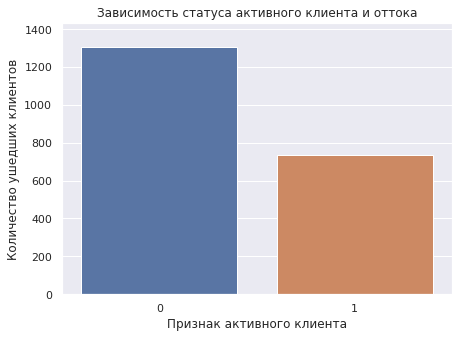

In [259]:
plt.figure(figsize = (7,5))

sns.barplot(data=churn_data, x='IsActiveMember', y='Exited', estimator=sum, errwidth=0)
plt.title('Зависимость статуса активного клиента и оттока')
plt.xlabel('Признак активного клиента')
plt.ylabel('Количество ушедших клиентов')
plt.show()

Количество неактивных клиентов среди ушедших практически в два раза больше, чем активных. Поэтому банку следует качественнее работать с клиентами, у которых наблюдается признак "неактивный клиент", как вариант, предложив более выгодные условия обслуживания по карте или вкладу.

#### 9.9. В какой стране доля ушедших клиентов больше?

In [260]:
df = churn_data.groupby(by='Geography', as_index=False)['Exited'].sum()

fig = px.choropleth(
    data_frame = df,
    locations = "Geography",
    locationmode = "country names",
    color="Exited",
    title='Количество ушедших клиентов',
    width=600,
    height=400,
    color_continuous_scale='picnic'
)

fig.show()

Лидеры по оттоку в абсолютном выражении - Германия и Франция. Для анализа причин не достаточно данных, а также мало количество рассматриваемых стран. Вывод сделать можно, но он не будет иметь смысла.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

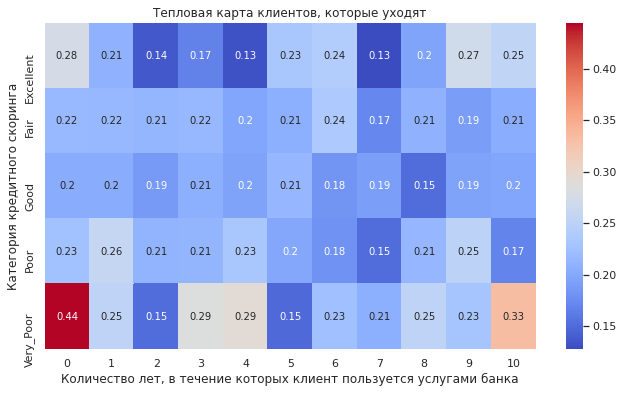

In [261]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data_3 = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
plt.figure(figsize = (11,6))

sns.heatmap(data=churn_data_3, annot=True, cmap='coolwarm')
plt.title('Тепловая карта клиентов, которые уходят')
plt.xlabel('Количество лет, в течение которых клиент пользуется услугами банка')
plt.ylabel('Категория кредитного скоринга')
plt.show()

Чаще всего банк покидают обчень бедные клиенты, пользующиеся услугами банка менее года, а так же клиенты, относящиеся к этой же категории, но находящиеся на обслуживании банка 10 и более лет.